In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
#     x = np.radians(x)
    return 1 / (1 - 0.49 * np.sin(x)**2)

In [36]:
def random_sample(left, right):
    return left + np.random.rand() * (right - left)

In [37]:
def standart(y):
    return np.sqrt((y**2).mean() - y.mean()**2)

In [38]:
def simson(left, right, y):
    n = y.shape[0] - 1
    temp =  (right - left) / (3 * (n+1))
    return temp *  (y[0] + 4*y[1:n-1:2].sum() + 2*y[2:n-2:2].sum() + y[n])

In [39]:
def monte_karlo(left, right, func, rolls):
    XX = np.linspace(left, right, rolls)

    n = 100000
    counter = 0

    ok_X = []
    ok_Y = []
    not_X = []
    not_Y = []

    for _ in range(n):
        x = random_sample(left, right)
        y = random_sample(down, up)
        true_y = func(x)
        if (true_y >= 0): 
            if (true_y >= y >= 0):
                ok_X.append(x)
                ok_Y.append(y)
                counter += 1
            else:
                not_X.append(x)
                not_Y.append(y)
        else:
            if (true_y <= y <= 0):
                ok_X.append(x)
                ok_Y.append(y)
                counter -= 1
            else:
                not_X.append(x)
                not_Y.append(y)

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.xaxis.set_ticks(np.arange(left, right, 0.5))
    ax.yaxis.set_ticks(np.arange(down, up, 0.5))
    ax.scatter(ok_X, ok_Y, color="blue")
    ax.scatter(not_X, not_Y, color="red")
    ax.plot(XX, func(XX), color="black")

    print("value ", counter / n * (right - left) * (up - down))
    print("deviation ", standart(np.array(ok_Y)))

In [40]:
left, right = (0, 1.6)
down, up = (-3, 3)

value  2.263008
deviation  0.4735974261149582


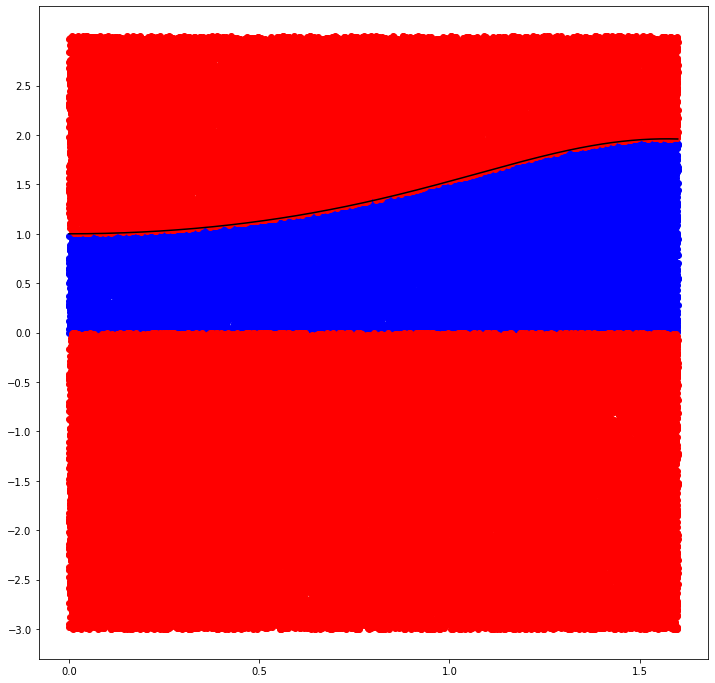

In [41]:
monte_karlo(left, right, func, 1000)

In [32]:
simson(left, right, func(np.linspace(left, right, 10000)))

2.2562621356123573

In [46]:
def adapt_simson(left, right, func, start_k, epsilon):    
    ans = simson(left, right, func(np.linspace(left, right, start_k)))
    start_k *= 2
    ans2 = simson(left, right, func(np.linspace(left, right, start_k)))
    if (abs(ans - ans2) > epsilon):
        middle = (left + right) / 2
        return adapt_simson(left, middle, funcc, start_k, epsilon) + adapt_simson(middle, right, func, start_k, epsilon)
    else:
        return ans2

In [47]:
adapt_simson(0, 1.6, func, 2, 10**(-4))

2.2479739889744708